In [1]:
#@title
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import scipy
from scipy import signal
import funciones_dinamica as fd

CESM1

In [2]:
path = '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Datos/CESM2_simulaciones'
NINO = pd.read_csv(path+'/timeseries_CESM2_1.csv', header=0)
serie = NINO['NINO_CESM2_1']

nino_filtrado = fd.PasaBajos(serie)
corregido1, moving_average = fd.remover_ma(nino_filtrado,2000)
corregido, moving_average2 = fd.remover_ma(corregido1,2000)

cr_filtrado = fd.close_returns(corregido[:])

In [ ]:
# close returns for plot
x, y = fd.close_returns_for_plot(corregido)

# definitions for the axes
left, width = 0.1, 2
bottom, height = 0.1, 0.2
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
#ax_histx = plt.axes(rect_histx)
#ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.scatter(x, y)

# now determine nice limits by hand:
binwidth = 0.25
lim = np.ceil(np.abs([x, y]).max() / binwidth) * binwidth
ax_scatter.set_xlim((0, 1600))
ax_scatter.set_ylim((0, 1600))

# Format the x-axis labels
ax_scatter.set_yticks(np.arange(0,1600,365))
ax_scatter.set_yticklabels(np.arange(0,5,1))
ax_scatter.set_xticks(np.arange(0,10000,365))
ax_scatter.set_xticklabels(np.arange(0,28,1))
# Rotate the x-axis labels for better readability (optional)

# Add labels and title as needed
ax_scatter.set_xlabel('Year')

bins = np.arange(0, 1600 + 30, 30)
#ax_histx.hist(x, bins=bins)
ax_histy.hist(y, bins=bins, orientation='horizontal') #
#ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())
ax_histy.set_xlim(1,1000)

plt.show()  

CESM2

In [ ]:
path = '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Datos/CESM2_simulaciones'
NINO = pd.read_csv(path+'/timeseries_CESM2_1.csv', header=0)
serie = NINO['NINO_CESM2_1']

nino_filtrado = fd.PasaBajos(serie)
corregido1, moving_average = fd.remover_ma(nino_filtrado,2000)
corregido, moving_average2 = fd.remover_ma(corregido1,2000)

# close returns for plot
x, y = fd.close_returns_for_plot(corregido)

# definitions for the axes
left, width = 0.1, 2
bottom, height = 0.1, 0.2
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
#ax_histx = plt.axes(rect_histx)
#ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.scatter(x, y)

# now determine nice limits by hand:
binwidth = 0.25
lim = np.ceil(np.abs([x, y]).max() / binwidth) * binwidth
ax_scatter.set_xlim((0, 1600))
ax_scatter.set_ylim((0, 1600))

# Format the x-axis labels
ax_scatter.set_yticks(np.arange(0,1600,365))
ax_scatter.set_yticklabels(np.arange(0,5,1))
ax_scatter.set_xticks(np.arange(0,10000,365))
ax_scatter.set_xticklabels(np.arange(0,28,1))
# Rotate the x-axis labels for better readability (optional)

# Add labels and title as needed
ax_scatter.set_xlabel('i [Year]')
ax_scatter.set_xlabel('j [Year]')

bins = np.arange(0, 1600 + 30, 30)
#ax_histx.hist(x, bins=bins)
ax_histy.hist(y, bins=bins, orientation='horizontal') #
#ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())
ax_histy.set_xlim(1,1000)

plt.show()  

In [190]:
def close_returns(senal):
    cr =  np.zeros((len(senal),2000)) #cr de close returns
    eps = (np.max(senal)-np.min(senal))*0.001
    for j in range(2000):
      for i in range(len(senal)-2000):
        if (np.abs(senal[i+j] - senal[i]) < eps) and (np.abs(senal[i+j+4] - senal[i+4]) < eps):
          cr[i,j] = 1
    return cr
import numpy as np

# Example usage:
#senal = np.random.rand(10000)  # Replace this with your actual signal
#result_matrix = close_returns(senal)


In [191]:

#cr_filtrado_otro = another_close_returns(nino_filtrado[:5000])

In [192]:
cr_filtrado.shape

(60225, 2000)

In [193]:
def find_indices(matrix):
    indices = np.where(matrix == 1)
    return list(zip(indices[0], indices[1]))

result = find_indices(cr_filtrado)


In [195]:
x = []
y = []

for m in result:
    x.append(m[0])
    y.append(m[1])


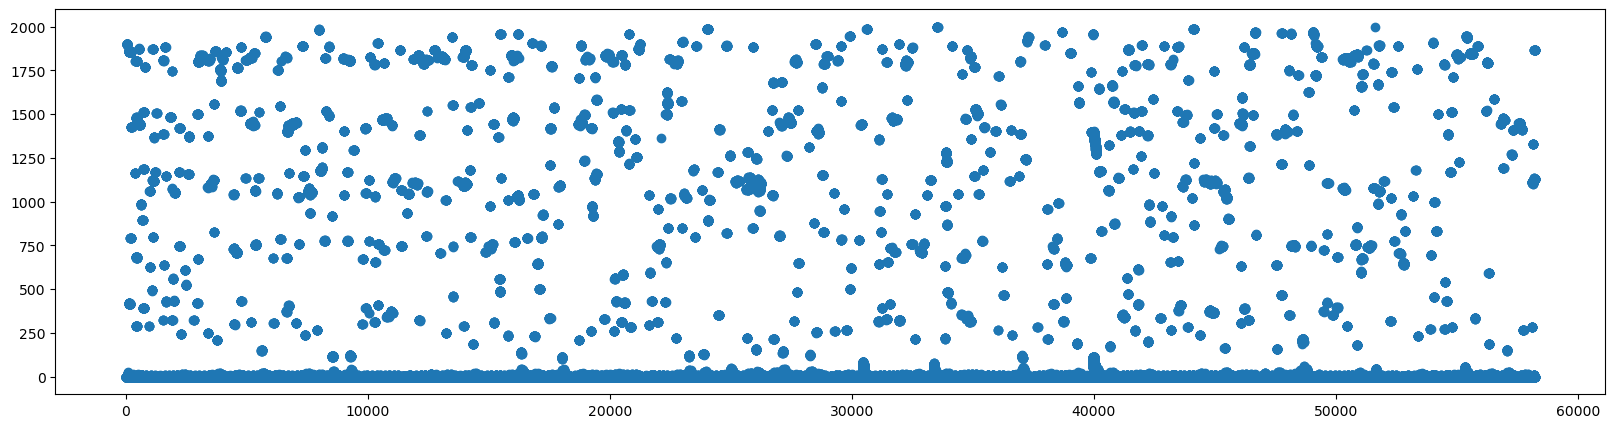

In [196]:
plt.figure(figsize=(20,5))
plt.scatter(x[:],y[:])

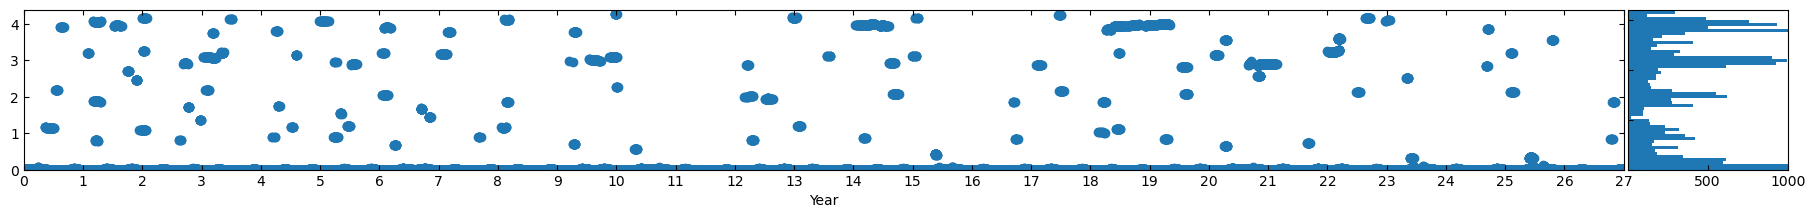

In [203]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

# the random data
x, y = fd.close_returns_for_plot(corregido)

# definitions for the axes
left, width = 0.1, 2
bottom, height = 0.1, 0.2
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
#ax_histx = plt.axes(rect_histx)
#ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.scatter(x, y)

# now determine nice limits by hand:
binwidth = 0.25
lim = np.ceil(np.abs([x, y]).max() / binwidth) * binwidth
ax_scatter.set_xlim((0, 1600))
ax_scatter.set_ylim((0, 1600))

# Format the x-axis labels
ax_scatter.set_yticks(np.arange(0,1600,365))
ax_scatter.set_yticklabels(np.arange(0,5,1))
ax_scatter.set_xticks(np.arange(0,10000,365))
ax_scatter.set_xticklabels(np.arange(0,28,1))
# Rotate the x-axis labels for better readability (optional)

# Add labels and title as needed
ax_scatter.set_xlabel('Year')

bins = np.arange(0, 1600 + 30, 30)
#ax_histx.hist(x, bins=bins)
ax_histy.hist(y, bins=bins, orientation='horizontal') #
#ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())
ax_histy.set_xlim(1,1000)

plt.show()  

In [ ]:
lista2=[]
lista2=glob.glob(path_integraciones+'/periodo4_masruido/*.txt')
lista2.sort()

print(len(lista2))